In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

## Run GPU DSM

Check the input input file for simulation

In [92]:
f = open('input.dat', 'r')
file_contents = f.read()
print (file_contents)
f.close()

	1
	linear
	16
	1000
	0.0     0.0 0.0 0.0     0.0     0.0     0.0     0.0     0.0
	1
	0
	1
	1.0
	10000



Run the simulation

In [93]:
!./gpu_DSM

device Count 1 
Using device 0: GeForce GTX 780



Architecture is linear
simulation parameters:
NK	Beta	N_cha
16	1	1000
deformation tensor:
0	0	0
0	0	0
0	0	0
G(t) calculation is on
simulation time, sync time
10000	1
generating chain conformations on host..done
preparing GPU random number generator parameters..
device random number generator parameters done
preparing GPU chain conformations..
 device constants done

 GPU random generator init: 


  device random generators 1 seeding...done
  device random generators 2 seeding...done
  preparing random number sequence...done
 GPU random generator init done.

 Number of ensemble blocks 1
number of correlator levels	5

  copying chains to device block 1. chains in the ensemble block 1000
 device chains done
init done
G(t) calc...



0	6.68496
1	5.34841
2	4.84171
3	4.53026
4	4.30486
5	4.12724
6	3.98051
7	3.85495
8	3.7456
9	3.64862
10	3.56097
11	3.48163
12	3.40934
13	3.34187
14	3.27929
15	3.22079
16	3.18365
24	2.82688
32	2.57486
40	2.37975
48	2.21941
56	2.08451
64	1.96883
72	1.86881
80	1.77955
88	1.69939
96	1.62724
104	1.5614
112	1.50096
120	1.44379
128	1.41075
192	1.08212
256	0.869049
320	0.719227
384	0.602289
448	0.508947
512	0.436639
576	0.381287
640	0.335781
704	0.296791
768	0.264048
832	0.230138
896	0.202832
960	0.175693
1024	0.17366
1536	0.0759347
2048	0.0345397
2560	0.0180493
3072	0.00037736
3584	0.00195464
4096	-0.000970548
4608	-0.00613486
5120	0.00161151
5632	-0.000998015
6144	-0.00590883
6656	-0.00620558
7168	0.000956536
7680	-0.000786022


Memory cleanup.. done.
Calculation time: 9983.38 milliseconds


## Simulation results and fitting

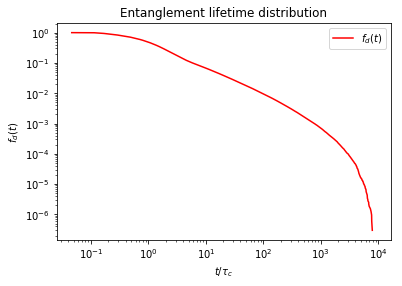

In [95]:
with open('fdt.dat') as f:
    lines = f.readlines()
    x = np.array([float(line.split()[0]) for line in lines])
    y = np.array([float(line.split()[1]) for line in lines])

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Entanglement lifetime distribution")    
ax1.set_xlabel(r'$t/\tau_c$')
ax1.set_ylabel(r'$f_d(t)$')

ax1.plot(x,y, c='r', label=r'$f_d(t)$')

leg = ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')

plt.show()

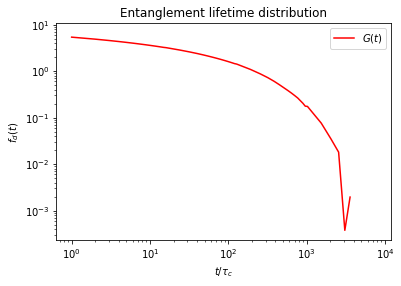

In [96]:
with open('G.dat') as g:
    lines = g.readlines()
    x = np.array([float(line.split()[0]) for line in lines])
    y = np.array([float(line.split()[1]) for line in lines])

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Entanglement lifetime distribution")    
ax1.set_xlabel(r'$t/\tau_c$')
ax1.set_ylabel(r'$f_d(t)$')

ax1.plot(x,y, c='r', label=r'$G(t)$')

leg = ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')

plt.show()

In [97]:
tfinal=x[-1]
GN0=y[0]

In [98]:
nmodes=10

In [99]:
lambdaArrInit=10.0**(np.array(range(nmodes), float) + 1.0) / nmodes * np.log10(tfinal)
gArrInit=np.full(nmodes, 1.0/nmodes)
def G(time, params):
    lambdaArr = np.split(params,2)[0]
    gArr = np.split(params,2)[1]
    return np.dot(np.exp(-time/lambdaArr), gArr) * GN0

#Vectorize function G
Gvec=np.vectorize(G, excluded=['params'])

#Define residuals
def residuals(param):
    return Gvec(time=x, params=param)-y

In [101]:
Gvec(time=x, params=np.append(lambdaArrInit, gArrInit))-y

array([ 0.        ,  1.16595757,  1.5369247 ,  1.73967893,  1.8773707 ,
        1.98359105,  2.07161071,  2.14834963,  2.21660118,  2.27852843,
        2.33587309,  2.38864964,  2.43733893,  2.48356685,  2.52679467,
        2.56746838,  2.58802493,  2.83829781,  3.00770664,  3.13400729,
        3.23609004,  3.32127166,  3.39421341,  3.45721606,  3.51415518,
        3.56585634,  3.6127296 ,  3.65592078,  3.69588805,  3.73439293,
        3.75027475,  3.97407027,  4.10973592,  4.19484365,  4.25581369,
        4.30023566,  4.32954805,  4.34693672,  4.35876643,  4.36773703,
        4.37358318,  4.38326542,  4.38862782,  4.39578062,  4.37950732,
        4.36923119,  4.33626118,  4.29223966,  4.2573666 ,  4.20911846,
        4.17023346,  4.13777958,  4.09607963,  4.06795349,  4.04495909,
        4.01984243,  3.98946204,  3.96992134])

In [102]:
residuals(np.append(lambdaArrInit, gArrInit))

array([ 0.        ,  1.16595757,  1.5369247 ,  1.73967893,  1.8773707 ,
        1.98359105,  2.07161071,  2.14834963,  2.21660118,  2.27852843,
        2.33587309,  2.38864964,  2.43733893,  2.48356685,  2.52679467,
        2.56746838,  2.58802493,  2.83829781,  3.00770664,  3.13400729,
        3.23609004,  3.32127166,  3.39421341,  3.45721606,  3.51415518,
        3.56585634,  3.6127296 ,  3.65592078,  3.69588805,  3.73439293,
        3.75027475,  3.97407027,  4.10973592,  4.19484365,  4.25581369,
        4.30023566,  4.32954805,  4.34693672,  4.35876643,  4.36773703,
        4.37358318,  4.38326542,  4.38862782,  4.39578062,  4.37950732,
        4.36923119,  4.33626118,  4.29223966,  4.2573666 ,  4.20911846,
        4.17023346,  4.13777958,  4.09607963,  4.06795349,  4.04495909,
        4.01984243,  3.98946204,  3.96992134])

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


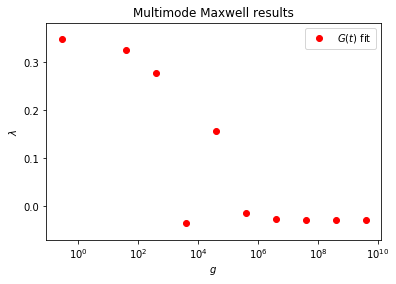

In [103]:
res_1 = least_squares(residuals, np.append(lambdaArrInit, gArrInit))
res_1.x

fig2 = plt.figure()

ax1 = fig2.add_subplot(111)

ax1.set_title("Multimode Maxwell results")
ax1.set_xlabel(r'$g$')
ax1.set_ylabel(r'$\lambda$')

ax1.scatter(np.split(res_1.x,2)[0],np.split(res_1.x,2)[1], c='r', label=r'$G(t)$ fit')
leg = ax1.legend()
ax1.set_xscale('log')

plt.show()

**Check results of fitting**

In [105]:
fig3 = plt.figure()

ax2 = fig.add_subplot(111)

ax2.set_title("Check results of the fit")
ax2.set_xlabel(r'$t/\tau_c$')
ax2.set_ylabel(r'$G(t)$')

ax2.plot(x,Gvec(time=x, params=res_1.x), c='r', label=r'$G(t)$ fit')
ax2.plot(x,y, c='g', label=r'$G(t)$')
leg = ax1.legend()
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.show()
